In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris_dataset = load_iris()

print(iris_dataset.keys())
iris_dataset.target

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
print(iris_dataset.feature_names)
print(iris_dataset.target.shape,"\n",iris_dataset.data.shape)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150,) 
 (150, 4)


In [4]:
df = pd.DataFrame(iris_dataset.data,columns=iris_dataset.feature_names)
df["Target"]=iris_dataset.target
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df = pd.DataFrame(np.append(iris_dataset.data, iris_dataset.target.reshape(150,1), axis=1),
                  columns=np.append(iris_dataset.feature_names,"class"))
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
# class distribution
print(df.groupby('class').size())
print("Sample count per class: {}".format({n:v for n,v in zip(iris_dataset.target_names, np.bincount(iris_dataset.target))}))

class
0.0    50
1.0    50
2.0    50
dtype: int64
Sample count per class: {'setosa': 50, 'versicolor': 50, 'virginica': 50}


In [8]:
## KNN model in iris dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.signal import argrelextrema 

X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data, iris_dataset.target, random_state=0, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print("Test set score: {}".format(np.mean(y_predict == y_test)))
print("KNN Test set score: {}".format(knn.score(X_test, y_test)))

Test set score: 0.9736842105263158
KNN Test set score: 0.9736842105263158


(0.89, 0.99)

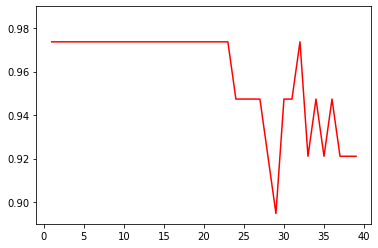

In [9]:
arr=[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    knn.predict(X_test)
    arr.append(knn.score(X_test, y_test))
    
plt.plot(np.arange(1,40),arr,c="r")
plt.ylim(0.89,0.99)

In [10]:
##  Support Vector Machines(SVM) on iris dataset
from sklearn import svm

svc_model = svm.SVC(gamma="scale",C=100.,kernel="linear")
svc_model.fit(X_train, y_train)
#svc_model.predict(X_test, y_test)
print("Test set score: {}".format(svc_model.score(X_train, y_train)))

Test set score: 0.9910714285714286
